# Using SVM for credit card default preictions

The necessary imports for importing cleaning and manipulating the data are imported.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

## After importing modules, import data set.


In [33]:
df = pd.read_csv(r'C:\Users\Ayomide\Desktop\UCI_Credit_Card.xls', header=0, sep=",")

In [34]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
df.drop("ID",axis=1, inplace=True)

In [36]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## The index has been dropped, the point is to remove unnecessary dataset

## Next identify and deal with missing data.


Check if there is any missing data here in this part of the code.


In [37]:
df["SEX"].unique()

array([2, 1], dtype=int64)

In [38]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [39]:
df["LIMIT_BAL"].unique()

array([  20000.,  120000.,   90000.,   50000.,  500000.,  100000.,
        140000.,  200000.,  260000.,  630000.,   70000.,  250000.,
        320000.,  360000.,  180000.,  130000.,  450000.,   60000.,
        230000.,  160000.,  280000.,   10000.,   40000.,  210000.,
        150000.,  380000.,  310000.,  400000.,   80000.,  290000.,
        340000.,  300000.,   30000.,  240000.,  470000.,  480000.,
        350000.,  330000.,  110000.,  420000.,  170000.,  370000.,
        270000.,  220000.,  190000.,  510000.,  460000.,  440000.,
        410000.,  490000.,  390000.,  580000.,  600000.,  620000.,
        610000.,  700000.,  670000.,  680000.,  430000.,  550000.,
        540000., 1000000.,  530000.,  710000.,  560000.,  520000.,
        750000.,  640000.,   16000.,  570000.,  590000.,  660000.,
        720000.,  327680.,  740000.,  800000.,  760000.,  690000.,
        650000.,  780000.,  730000.])

We have 3000 rows of data. We can downsize the data to a thousand of each category .
i.e People that defaulted and one for the people that did not default .


In [40]:
df.columns = [x.lower() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_bal                   30000 non-null  float64
 1   sex                         30000 non-null  int64  
 2   education                   30000 non-null  int64  
 3   marriage                    30000 non-null  int64  
 4   age                         30000 non-null  int64  
 5   pay_0                       30000 non-null  int64  
 6   pay_2                       30000 non-null  int64  
 7   pay_3                       30000 non-null  int64  
 8   pay_4                       30000 non-null  int64  
 9   pay_5                       30000 non-null  int64  
 10  pay_6                       30000 non-null  int64  
 11  bill_amt1                   30000 non-null  float64
 12  bill_amt2                   30000 non-null  float64
 13  bill_amt3                   300

## Rule of thumb

1. Make sure the code is clean / lean
2. Remove or fill missing values
3. Check values are all acceptable
4. Fix if they are not.


In [41]:
filt = (df["education"] == 0) | (df["marriage"] == 0) 
df_no_missing = df.loc[~filt]

## Rule for the actual machine learning

Downsample or group the data based on how you need it.


In [42]:
df_no_missing =  df_no_missing.rename(columns={"default.payment.next.month" : "default"})

In [43]:
default_filter = df_no_missing["default"] == 1
df_defaulters = df_no_missing.loc[default_filter]
df_non_defaulters = df_no_missing.loc[~default_filter]

In [44]:
df_default_downsampled = resample(df_defaulters, replace=False, n_samples=1000)
df_non_default_downsampled = resample(df_non_defaulters, replace=False, n_samples=1000)

In [45]:
df_downsampled = pd.concat([df_default_downsampled, df_non_default_downsampled])

In [46]:
len(df_downsampled)

2000

## Making the support vector machine

First split data into two parts

1. Contains the features
2. Contains the labels


In [47]:
X = df_downsampled.drop("default", axis=1).copy()
X.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
26749,60000.0,1,2,2,27,2,0,0,2,0,...,60877.0,56138.0,56806.0,57935.0,2632.0,5924.0,0.0,2200.0,2200.0,2290.0
1538,130000.0,2,2,2,25,-1,-1,-1,-1,-1,...,776.0,776.0,776.0,776.0,1583.0,1000.0,776.0,776.0,776.0,12184.0
29894,210000.0,1,2,1,45,-1,-1,-1,-1,-1,...,4049.0,345.0,650.0,3217.0,4369.0,4049.0,348.0,650.0,3217.0,3912.0
6087,200000.0,1,2,2,36,0,0,0,0,0,...,98897.0,94943.0,96967.0,99016.0,4841.0,4300.0,3300.0,3361.0,3500.0,3206.0
26230,270000.0,2,3,1,47,-1,-1,-1,2,2,...,123.0,123.0,0.0,0.0,123.0,123.0,0.0,0.0,0.0,0.0


In [48]:
y = df_downsampled["default"].copy()
y.head()

26749    1
1538     1
29894    1
6087     1
26230    1
Name: default, dtype: int64

## One hot encoding

Notice that the categorical data needsto be modified
Continious data is fine but catgorical data is not
The columns of categorical data are

1. Marrige
2. Education
3. Pay 



In [49]:
X_encoded = pd.get_dummies(X, columns=['marriage', "sex", "education", "pay_0","pay_2", "pay_3", "pay_4", "pay_5", "pay_6"])

X_encoded.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_7,pay_6_-2,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7
26749,60000.0,27,58598.0,56486.0,60877.0,56138.0,56806.0,57935.0,2632.0,5924.0,...,0,0,0,1,0,0,0,0,0,0
1538,130000.0,25,1031.0,1583.0,776.0,776.0,776.0,776.0,1583.0,1000.0,...,0,0,1,0,0,0,0,0,0,0
29894,210000.0,45,1792.0,4339.0,4049.0,345.0,650.0,3217.0,4369.0,4049.0,...,0,0,1,0,0,0,0,0,0,0
6087,200000.0,36,99483.0,97546.0,98897.0,94943.0,96967.0,99016.0,4841.0,4300.0,...,0,0,0,1,0,0,0,0,0,0
26230,270000.0,47,123.0,123.0,123.0,123.0,0.0,0.0,123.0,123.0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Using the support vector machine 


In [51]:
clf_svm = SVC()

In [52]:
clf_svm.fit(X_train_scaled, y_train)         
accuracy = clf_svm.score(X_test, y_test)
accuracy                             

0.492

## Testing the SVC

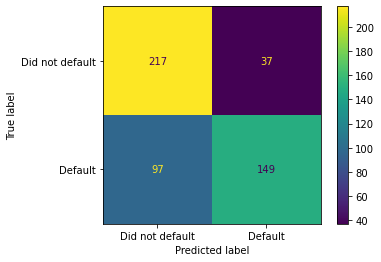

In [53]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test,
                      values_format="d",
                      display_labels=["Did not default", "Default"]                      
                     )